# Desafío N° 2 
## 6 - Separando datos de prueba del Dataset Properati.

### Grupo N° 5

    Integrantes:
                Arangue, Marcelo            
                Bardauil, Joaquín              
                Marquez, Hector              
                Neustadt, Alejandro       
                Pero, Felipe                                    


## Obtención de los datos y librerías necesarias.

In [1]:
# Importamos las librerías que usaremos durante la limpieza:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats as sts
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from IPython.display import display

In [2]:
# Importamos el dataset y nombramos al objeto "df_prueba"
df_prueba = pd.read_csv("prueba.csv")

## 1. Relevamiento inicial y diagnóstico del estado del dataset

In [3]:
# Conocemos cual es el tamaño del dataset
df_prueba.shape

(810, 23)

In [4]:
df_prueba.surface_covered_in_m2 = df_prueba.surface_total_in_m2

Este ultimo chequeo me ayuda a ver que coinciden los blancos en precio y precios por sup

In [5]:
# Como considero valida la columna 'price_aprox_usd', con ella y las superficies recalculo 'price_per_m2', previo un chequeo
# primero la hago contra m2 cubiertos y luego sobre sup total.
# En el mejor de los casos, cuantos registros podre completar bien en precio/m2 = 90213
con_precio = (df_prueba.price_aprox_usd > 0) & (df_prueba.surface_covered_in_m2 > 0) &\
         (df_prueba.surface_total_in_m2 > 0) & (df_prueba.surface_total_in_m2 >= df_prueba.surface_covered_in_m2)
precio_m2c = df_prueba.price_aprox_usd[con_precio] / df_prueba.surface_covered_in_m2[con_precio]
precio_m2t = df_prueba.price_aprox_usd[con_precio] / df_prueba.surface_total_in_m2[con_precio]
con_precio.sum()

722

Las coincidencias son sobre superficie total, en 'price_usd_per_m2' es el valor dolar sobre superficie total.
A 'price_per_m2', lo puedo recalcular como esta o como 'price_usd_per_m2_cubierto', a definir, en precio coinciden mas las superficies cubiertas

In [6]:
# Calculo y reemplazo valores
# Mas adelante renombraria a 'price_per_m2' en 'price_usd_per_m2_cov'
df_prueba.price_per_m2 = precio_m2c
# Mas adelante renombraria a 'price_usd_per_m2' en 'price_usd_per_m2_tot'
df_prueba.price_usd_per_m2 = precio_m2t

In [7]:
df_prueba.property_type.value_counts()

house        565
apartment    169
store         40
PH            36
Name: property_type, dtype: int64

In [8]:
tabla_tipo_prop = df_prueba.groupby('property_type')['price_aprox_usd', 'surface_total_in_m2', 'price_usd_per_m2',\
                                                         'expenses'].mean()

In [9]:
tabla_tipo_prop.round(1)

,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,expenses
property_type,,,,
PH,154000.0,72.4,3493.3,4000.0
apartment,208071.9,71.2,5261.7,2575.5
house,334659.3,172.9,3071.3,28040.3
store,901155.4,482.7,2868.6,630.8


### Extracciones de la columna description

Aplicamos expresiones regulares para extraer información relevante de la columna ´description´

In [10]:
df_ronul = df_prueba.loc[df_prueba['rooms'].isnull()]

df_ronul_descripnotnul = df_ronul.loc[df_ronul["description"].notnull()]

MONOAMBIENTE = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(MONOAMBIENTE|MONO$)", flags=re.I, regex=True)]
UN_AMBIENTE = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(1|UN) (AMB|AMBIENTE)", regex=True)]
DOS_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(2|DOS) (AMB|AMBIENTES)", flags=re.I, regex=True)]
TRES_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(3|TRES) (AMB|AMBIENTES)",flags=re.I, regex=True)]
CUATRO_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(4|CUATRO) (AMB|AMBIENTES)",flags=re.I, regex=True)]
CINCO_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(5|CINCO) (AMB|AMBIENTES)", flags=re.I, regex=True)]
SEIS_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(6|SEIS) (AMB|AMBIENTES)", flags=re.I, regex=True)]
SIETE_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(7|SIETE) (AMB|AMBIENTES)",flags=re.I, regex=True)]
OCHO_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(8|OCHO) (AMB|AMBIENTES)", flags=re.I, regex=True)]
NUEVE_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(9|NUEVE) (AMB|AMBIENTES)",flags=re.I, regex=True)]
DIEZ_AMBIENTES = df_ronul_descripnotnul[df_ronul_descripnotnul["description"].str.contains(r"(10|DIEZ) (AMB|AMBIENTES)", flags=re.I, regex=True)]

#IMPUTACION

indexes = list(MONOAMBIENTE.index)
indexesa = list(UN_AMBIENTE.index)
indexesb = list(DOS_AMBIENTES.index)
indexesc = list(TRES_AMBIENTES.index)
indexesd = list(CUATRO_AMBIENTES.index)
indexese = list(CINCO_AMBIENTES.index)
indexesf = list(SEIS_AMBIENTES.index)
indexesg = list(SIETE_AMBIENTES.index)
indexesh = list(OCHO_AMBIENTES.index)
indexesi = list(NUEVE_AMBIENTES.index)
indexesj = list(DIEZ_AMBIENTES.index)

df_prueba.loc[indexes,'rooms'] = 1
df_prueba.loc[indexesa,'rooms'] = 1
df_prueba.loc[indexesb,'rooms'] = 1
df_prueba.loc[indexesc,'rooms'] = 2
df_prueba.loc[indexesd,'rooms'] = 3
df_prueba.loc[indexese,'rooms'] = 4
df_prueba.loc[indexesf,'rooms'] = 5
df_prueba.loc[indexesg,'rooms'] = 6
df_prueba.loc[indexesh,'rooms'] = 7
df_prueba.loc[indexesi,'rooms'] = 8
df_prueba.loc[indexesj,'rooms'] = 9

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
C:\Users\aneustadt\Ap

In [11]:
df_fonul = df_prueba.loc[df_prueba['floor'].isnull()]
df_fonul_descripnotnul = df_fonul.loc[df_fonul["description"].notnull()]

planta_alta = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"planta alta",flags=re.I, regex=True)]
dospisos = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(2.|2|dos) (piso|pisos|plantas)",flags=re.I, regex=True)]
tercerpiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(3.|3) piso",flags=re.I, regex=True)]
cuartopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(4.|4) piso",flags=re.I, regex=True)]
quintopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(5.|5) piso",flags=re.I, regex=True)]
sextopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(6.|6) piso",flags=re.I, regex=True)]
septimopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(7.|7) piso",flags=re.I, regex=True)]
octavopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(8.|8) piso",flags=re.I, regex=True)]
novenopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(9.|9) piso",flags=re.I, regex=True)]
decimopiso = df_fonul_descripnotnul[df_fonul_descripnotnul["description"].str.contains(r"(10.|10) piso",flags=re.I, regex=True)]

# IMPUTACION
indexes_plantaalta = list(planta_alta.index)
indexes_dospisos = list(dospisos.index)
indexes_tercerpiso = list(tercerpiso.index)
indexes_cuartopiso = list(cuartopiso.index)
indexes_quintopiso = list(quintopiso.index)
indexes_sextopiso = list(sextopiso.index)
indexes_septimopiso = list(septimopiso.index)
indexes_octavopiso = list(octavopiso.index)
indexes_novenopiso = list(novenopiso.index)
indexes_decimopiso = list(decimopiso.index)

df_prueba.loc[indexes_plantaalta,'floor'] = 2
df_prueba.loc[indexes_dospisos,'floor'] = 2
df_prueba.loc[indexes_tercerpiso,'floor'] = 3
df_prueba.loc[indexes_cuartopiso,'floor'] = 4
df_prueba.loc[indexes_quintopiso,'floor'] = 5
df_prueba.loc[indexes_sextopiso,'floor'] = 6
df_prueba.loc[indexes_septimopiso,'floor'] = 7
df_prueba.loc[indexes_octavopiso,'floor'] = 8
df_prueba.loc[indexes_novenopiso,'floor'] = 9
df_prueba.loc[indexes_decimopiso,'floor'] = 10

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':
C:\Users\aneustadt\Ap

In [12]:
df_exnul = df_prueba.loc[df_prueba['expenses'].isnull()]
df_exnul_descripnotnul = df_exnul.loc[df_exnul["description"].notnull()]

NOEXPENSAS = df_exnul_descripnotnul[df_exnul_descripnotnul["description"].str.contains(r"(no hay|no paga|no tiene|sin) expensas",flags=re.I, regex=True)]
# 1700

# IMPUTACION
indexes_NOEXPENSAS = list(NOEXPENSAS.index)
df_prueba.loc[indexes_NOEXPENSAS,'expenses'] = 0

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [13]:
df_cunul = df_prueba.loc[df_prueba['currency'].isnull()]
df_cunul_descripnotnul = df_cunul.loc[df_cunul["description"].notnull()]

DOLARES = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"\d+ DOLARES",flags=re.I, regex=True)]
DOLARES_1 = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"usd",flags=re.I, regex=True)]
DOLARES_2 = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"(U\$D|U\$S|U\$) \d+",flags=re.I, regex=True)]
PESOS = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"\d+ PESOS",flags=re.I, regex=True)]
PESOS_1 = df_cunul_descripnotnul[df_cunul_descripnotnul["description"].str.contains(r"\$\d+",flags=re.I, regex=True)]

# IMPUTACION
indexes_DOLARES = list(DOLARES.index)
indexes_DOLARES_1 = list(DOLARES_1.index)
indexes_DOLARES_2 = list(DOLARES_2.index)
indexes_PESOS = list(PESOS.index)
indexes_PESOS_1 = list(PESOS_1.index)

df_prueba.loc[indexes_DOLARES,'currency'] = "USD"
df_prueba.loc[indexes_DOLARES_1,'currency'] = "USD"
df_prueba.loc[indexes_DOLARES_2,'currency'] = "USD"
df_prueba.loc[indexes_PESOS,'currency'] = "ARS"
df_prueba.loc[indexes_PESOS_1,'currency'] = "ARS"

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [14]:
# Agrego una columna que indicara si el lugar es un Country Club o Barrio Cerrado
df_prueba['cc_barrio_c'] = np.nan

In [15]:
# Debo seguir para encontarr al country y/o barrio cerrado

df_banul = df_prueba.loc[df_prueba['cc_barrio_c'].isnull()]
df_banul_descripnotnul = df_banul.loc[df_banul['lugar'].notnull()]

country_barrio = df_banul_descripnotnul[df_banul_descripnotnul["lugar"].str.contains(r"(country|barrio cerrado|cc|Nordelta)",flags=re.I, regex=True)]

# IMPUTACION
indexes_country_barrio = list(country_barrio.index)
df_prueba.loc[indexes_country_barrio,'cc_barrio_c'] = 1

C:\Users\aneustadt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [16]:
df_prueba['cc_barrio_c'].notnull().sum()

58

## Finalmente
1 Eliminamos los nulos y errores como los 1106 de sup cubierta > sup total.

2 Quitamos Outliers.

3 Separamos las bases segun typo de propiedad.

4 Extraemos el dataframe procesado a unos nuevos csv.

In [17]:
df_prueba.columns

Index(['Unnamed: 0', 'property_type', 'title', 'description',
       'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'floor',
       'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2', 'price',
       'currency', 'price_aprox_local_currency', 'expenses', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'ciudad', 'barrio', 'lugar',
       'cc_barrio_c'],
      dtype='object')

In [18]:
df_prueba.shape

(810, 24)

In [19]:
# Analisis de registros duplicados (todas las columnas)
duplicados = df_prueba[df_prueba.duplicated(keep='first')]
len(duplicados)

0

In [20]:
# Ahora todos los nulos en precio y superficies

In [21]:
mask_nulos = -((df_prueba.price_aprox_usd > 0) & (df_prueba.surface_covered_in_m2 > 0) &\
        (df_prueba.surface_total_in_m2 > 0) & (df_prueba.price_per_m2 > 0) & (df_prueba.price_usd_per_m2 > 0))

In [22]:
mask_nulos.value_counts()

False    722
True      88
dtype: int64

In [23]:
df_prueba.drop(df_prueba[mask_nulos].index, inplace=True)

In [24]:
# Ahora las columnas que no agregan valor
df_prueba.drop(['price', 'currency', 'price_aprox_local_currency'], axis=1, inplace=True)
df_prueba.columns

Index(['Unnamed: 0', 'property_type', 'title', 'description',
       'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'floor',
       'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2', 'expenses',
       'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'ciudad',
       'barrio', 'lugar', 'cc_barrio_c'],
      dtype='object')

In [25]:
df_prueba.shape

(722, 21)

In [26]:
# Renombro columnas de precio/m2 en superficies cubiertas y total
df_prueba = df_prueba.rename(columns = {'price_per_m2':'price_usd_per_m2_cov',\
                                                'price_usd_per_m2':'price_usd_per_m2_tot'})
df_prueba.columns

Index(['Unnamed: 0', 'property_type', 'title', 'description',
       'surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'floor',
       'price_aprox_usd', 'price_usd_per_m2_tot', 'price_usd_per_m2_cov',
       'expenses', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'ciudad', 'barrio', 'lugar', 'cc_barrio_c'],
      dtype='object')

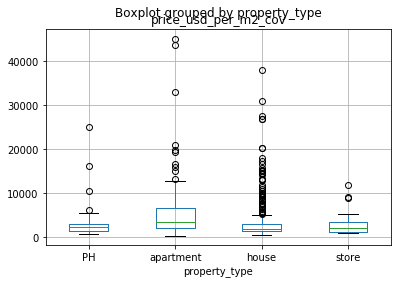

In [27]:
# Ahora veremos los Outliers en precio por typo de propiedad
df_prueba.boxplot(column='price_usd_per_m2_cov', by='property_type')

In [28]:
df_prueba.groupby('property_type')['price_usd_per_m2_cov'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,35.0,3493.277854,4733.595503,714.285714,1307.894737,2200.000000,2974.987975,25000.000000
apartment,159.0,5261.744614,6268.390217,253.807107,1954.848486,3440.365854,6431.088346,44900.000000
house,498.0,3071.254699,4151.247471,298.607676,1326.564626,1814.646465,2794.444444,38000.000000
store,30.0,2868.559291,2657.997362,875.000000,1162.121212,1880.731196,3353.493738,11818.181818


In [29]:
df_prueba.price_usd_per_m2_cov.describe()

count      722.000000
mean      3565.683847
std       4759.629182
min        253.807107
25%       1386.357298
50%       2020.833333
75%       3386.432927
max      44900.000000
Name: price_usd_per_m2_cov, dtype: float64

In [30]:
# Outlier para cada tipo de propiedad
a = (((df_prueba.price_usd_per_m2_cov[np.abs(df_prueba.price_usd_per_m2_cov) > \
        (3 * df_prueba.price_usd_per_m2_cov.std() + df_prueba.price_usd_per_m2_cov.mean())]\
       [df_prueba.property_type == 'PH'])) > 0).index

b = (((df_prueba.price_usd_per_m2_cov[np.abs(df_prueba.price_usd_per_m2_cov) > \
        (3 * df_prueba.price_usd_per_m2_cov.std() + df_prueba.price_usd_per_m2_cov.mean())]\
       [df_prueba.property_type == 'apartment'])) > 0).index

c = (((df_prueba.price_usd_per_m2_cov[np.abs(df_prueba.price_usd_per_m2_cov) > \
        (3 * df_prueba.price_usd_per_m2_cov.std() + df_prueba.price_usd_per_m2_cov.mean())]\
       [df_prueba.property_type == 'house'])) > 0).index

d = (((df_prueba.price_usd_per_m2_cov[np.abs(df_prueba.price_usd_per_m2_cov) > \
        (3 * df_prueba.price_usd_per_m2_cov.std() + df_prueba.price_usd_per_m2_cov.mean())]\
       [df_prueba.property_type == 'store'])) > 0).index

In [31]:
# Dropeo los Outlier por cada tipo de propiedad

df_prueba.drop(df_prueba.loc[a].index, inplace=True)
df_prueba.drop(df_prueba.loc[b].index, inplace=True)
df_prueba.drop(df_prueba.loc[c].index, inplace=True)
df_prueba.drop(df_prueba.loc[d].index, inplace=True)

df_prueba.shape

(707, 21)

In [32]:
# cargo cada base nueva
df_prueba[df_prueba.property_type == 'PH'].to_csv('prueba_PH.csv')
df_prueba[df_prueba.property_type == 'apartment'].to_csv('prueba_apartament.csv')
df_prueba[df_prueba.property_type == 'house'].to_csv('prueba_house.csv')
df_prueba[df_prueba.property_type == 'store'].to_csv('prueba_store.csv')

In [33]:
df_prueba.property_type.value_counts()

house        490
apartment    153
PH            34
store         30
Name: property_type, dtype: int64